In [1]:
%%capture
from dask_jobqueue import SLURMCluster
from dask.distributed import Client
import xarray as xr
import os
import time
import numpy as np

In [2]:
cluster = SLURMCluster(queue='mpi_short1', cores=24, memory='24GB', processes=6)
cluster

In [3]:
client = Client(cluster)
client

Client Scheduler: tcp://192.168.0.13:55926 Dashboard: http://192.168.0.13:8787/status,Cluster Workers: 0 Cores: 0 Memory: 0 B


In [10]:
argo_data = xr.open_dataset('/data/datos/ARGO/data/20190121_prof.nc')
argo_data

<xarray.Dataset>
Dimensions:                       (N_CALIB: 1, N_HISTORY: 0, N_LEVELS: 1024, N_PARAM: 3, N_PROF: 199)
Dimensions without coordinates: N_CALIB, N_HISTORY, N_LEVELS, N_PARAM, N_PROF
Data variables:
    DATA_TYPE                     object ...
    FORMAT_VERSION                object ...
    HANDBOOK_VERSION              object ...
    REFERENCE_DATE_TIME           object ...
    DATE_CREATION                 object ...
    DATE_UPDATE                   object ...
    PLATFORM_NUMBER               (N_PROF) object ...
    PROJECT_NAME                  (N_PROF) object ...
    PI_NAME                       (N_PROF) object ...
    STATION_PARAMETERS            (N_PROF, N_PARAM) object ...
    CYCLE_NUMBER                  (N_PROF) float64 ...
    DIRECTION                     (N_PROF) object ...
    DATA_CENTRE                   (N_PROF) object ...
    DC_REFERENCE                  (N_PROF) object ...
    DATA_STATE_INDICATOR          (N_PROF) object ...
    DATA_MODE        

In [11]:
argo_data.DATA_CENTRE[(argo_data.LATITUDE>-0.5) & (argo_data.LATITUDE<0.5)]

<xarray.DataArray 'DATA_CENTRE' (N_PROF: 5)>
array([b'AO', b'AO', b'AO', b'AO', b'AO'], dtype=object)
Dimensions without coordinates: N_PROF
Attributes:
    long_name:    Data centre in charge of float data processing
    conventions:  Argo reference table 4

In [12]:
plat_nm=argo_data.PLATFORM_NUMBER[(argo_data.LATITUDE>-0.5) & (argo_data.LATITUDE<0.5)].astype(str)
plat_nm

<xarray.DataArray 'PLATFORM_NUMBER' (N_PROF: 5)>
array(['3901162 ', '4901656 ', '5904947 ', '5904552 ', '3901159 '], dtype='<U8')
Dimensions without coordinates: N_PROF

In [13]:
#plat_nm.to_dataframe().to_csv('prof_list.txt',sep='\t',header=False, index=None)

In [106]:
traj = xr.open_dataset('/data/users/grivera/ARGO-traj/4901656_Rtraj.nc')
traj

<xarray.Dataset>
Dimensions:                              (N_CYCLE: 157, N_HISTORY: 25, N_MEASUREMENT: 7956, N_PARAM: 3)
Dimensions without coordinates: N_CYCLE, N_HISTORY, N_MEASUREMENT, N_PARAM
Data variables:
    DATA_TYPE                            object ...
    FORMAT_VERSION                       object ...
    HANDBOOK_VERSION                     object ...
    REFERENCE_DATE_TIME                  object ...
    DATE_CREATION                        object ...
    DATE_UPDATE                          object ...
    PLATFORM_NUMBER                      object ...
    PROJECT_NAME                         object ...
    PI_NAME                              object ...
    TRAJECTORY_PARAMETERS                (N_PARAM) object ...
    DATA_CENTRE                          object ...
    DATA_STATE_INDICATOR                 object ...
    PLATFORM_TYPE                        object ...
    FLOAT_SERIAL_NO                      object ...
    FIRMWARE_VERSION                     object ..

In [107]:
import datetime

In [177]:
olddate=np.datetime64(datetime.date.today()-datetime.timedelta(days=365))
olddate

numpy.datetime64('2018-01-22')

In [178]:
mask = traj.JULD>olddate
traj.JULD[mask]

<xarray.DataArray 'JULD' (N_MEASUREMENT: 1471)>
array(['2018-01-22T01:32:02.000153600', '2018-01-22T07:32:02.000797440',
       '2018-01-22T13:32:02.001441024', ..., '2019-01-11T12:17:30.001312256',
       '2019-01-11T12:17:30.001312256', '2019-01-11T12:17:30.001312256'],
      dtype='datetime64[ns]')
Dimensions without coordinates: N_MEASUREMENT
Attributes:
    long_name:      Julian day (UTC) of each measurement relative to REFERENC...
    standard_name:  time
    conventions:    Relative julian days with decimal part (as parts of day)
    resolution:     1.1574074051168282e-05
    axis:           T

In [179]:
lats = traj.LONGITUDE[mask]
lats

<xarray.DataArray 'LONGITUDE' (N_MEASUREMENT: 1471)>
array([    nan,     nan,     nan, ..., 173.249,     nan,     nan])
Dimensions without coordinates: N_MEASUREMENT
Attributes:
    long_name:      Longitude of each location
    standard_name:  longitude
    units:          degree_east
    valid_min:      -180.0
    valid_max:      180.0
    axis:           X

In [180]:
lons = traj.LATITUDE[mask]
lons

<xarray.DataArray 'LATITUDE' (N_MEASUREMENT: 1471)>
array([   nan,    nan,    nan, ..., -0.542,    nan,    nan])
Dimensions without coordinates: N_MEASUREMENT
Attributes:
    long_name:      Latitude of each location
    standard_name:  latitude
    units:          degree_north
    valid_min:      -90.0
    valid_max:      90.0
    axis:           Y

In [182]:
coords = np.column_stack((lats,lons)) #50723,70679
coords = coords[~np.isnan(coords)].reshape((37,2))
coords

array([[ 1.58969e+02,  9.26000e-01],
       [ 1.59555e+02,  1.41000e+00],
       [ 1.60382e+02,  1.48200e+00],
       [ 1.61806e+02,  1.17200e+00],
       [ 1.62898e+02,  1.27200e+00],
       [ 1.63303e+02,  9.58000e-01],
       [ 1.63474e+02,  6.88000e-01],
       [ 1.63903e+02,  3.86000e-01],
       [ 1.65488e+02,  9.51000e-01],
       [ 1.66777e+02,  1.07000e+00],
       [ 1.68003e+02,  8.58000e-01],
       [ 1.68886e+02,  9.87000e-01],
       [ 1.69415e+02,  9.99000e-01],
       [ 1.70084e+02,  8.77000e-01],
       [ 1.70692e+02,  1.23900e+00],
       [ 1.71073e+02,  9.73000e-01],
       [ 1.71399e+02,  9.64000e-01],
       [ 1.71658e+02,  1.16500e+00],
       [ 1.71750e+02,  1.28800e+00],
       [ 1.71736e+02,  1.13300e+00],
       [ 1.72440e+02,  1.52200e+00],
       [ 1.72130e+02,  5.79000e-01],
       [ 1.71007e+02,  1.69000e-01],
       [ 1.69697e+02,  2.85000e-01],
       [ 1.68699e+02,  8.12000e-01],
       [ 1.67858e+02,  5.27000e-01],
       [ 1.67371e+02, -6.68000e-01],
 

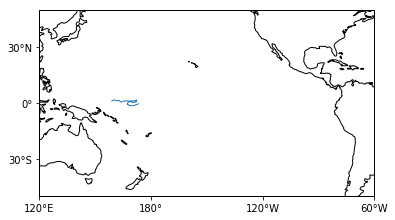

In [189]:
%matplotlib inline
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import matplotlib.pyplot as plt
proj = ccrs.PlateCarree(central_longitude=180)
fig, ax = plt.subplots(subplot_kw=dict(projection=proj))
ax.set_xticks([0, 60, 120, 180, 240, 300, 360], crs=ccrs.PlateCarree())
ax.set_yticks([-90, -60, -30, 0, 30, 60, 90], crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.plot(lats[~np.isnan(lats)]-180,lons[~np.isnan(lons)],ls='-',lw=1)
ax.set_extent([-60, 120, -50, 50], crs=proj)
ax.coastlines()